# **Fifa World Cup 2022 - Predictions**

Importando as Bibliotecas

In [90]:
import os, requests
from datetime import datetime
from IPython.display import Image

import pandas as pd
import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')

from matplotlib.pyplot import figure

# %matplotlib inline

## Variáveis de Utilidade Global
date_pattern = '%Y-%m-%d'

ranking_file = 'https://raw.githubusercontent.com/FabricioGSC/fifa_ranking_repository/master/dataset/men.csv'
images_folder = 'https://raw.githubusercontent.com/FabricioGSC/fifa_ranking_repository/master/dataset/img/{ABREV}.webp'

results_file = 'https://raw.githubusercontent.com/FabricioGSC/fifa_world_cup_2022_predictions/main/datasets/results.csv'
results_with_points = 'https://raw.githubusercontent.com/FabricioGSC/fifa_world_cup_2022_predictions/main/datasets/results_with_points.csv'


# **Loading dos Dados**

Os dados serão carregados de um arquivo results.csv que contém a tabela de resultados históricos de partidas entre seleções no período de 1872 a 2022. Posteriormente também iremos incrementar essa database com os dados de ranking da Fifa para os times que estarão se enfrentando.

Setando variáveis com os caminhos dos arquivos que serão utilizados

Carregando o DataSet de Resultados Históricos

In [91]:
full_match_history = pd.read_csv(results_file)
full_match_history

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43416,2022-03-30,Mexico,El Salvador,2,0,FIFA World Cup qualification,Mexico City,Mexico,False
43417,2022-03-30,Costa Rica,United States,2,0,FIFA World Cup qualification,San José,Costa Rica,False
43418,2022-03-30,Panama,Canada,1,0,FIFA World Cup qualification,Panama City,Panama,False
43419,2022-03-30,Jamaica,Honduras,2,1,FIFA World Cup qualification,Kingston,Jamaica,False


## **Análise Expliratória**

Será realizadas algumas consultas sobre o dataset para identificar possíveis registros duplicados, campos faltantes, informações irrelevantes ou que de alguma forma esteja dessincronizada com o próximo dataset a ser utilizado

In [92]:
# Verifica-se se há registros duplicados
full_match_history[full_match_history.duplicated()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


In [93]:
# Verificando se há colunas com valores null
for column in full_match_history.columns:
    null_columns = np.sum(full_match_history[column].isnull())
    print(f'{column} - {null_columns} registry with null values')

date - 0 registry with null values
home_team - 0 registry with null values
away_team - 0 registry with null values
home_score - 0 registry with null values
away_score - 0 registry with null values
tournament - 0 registry with null values
city - 0 registry with null values
country - 0 registry with null values
neutral - 0 registry with null values


In [94]:
# Verificando se há colunas com valores na
for column in full_match_history.columns:
    null_columns = np.sum(full_match_history[column].isna())
    print(f'{column} - {null_columns} registry with na values')

date - 0 registry with na values
home_team - 0 registry with na values
away_team - 0 registry with na values
home_score - 0 registry with na values
away_score - 0 registry with na values
tournament - 0 registry with na values
city - 0 registry with na values
country - 0 registry with na values
neutral - 0 registry with na values


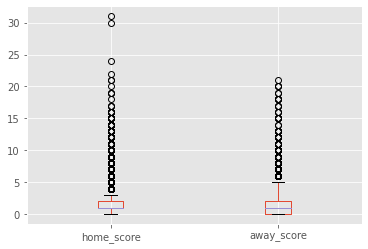

In [95]:
# Análise sobre a distribuição dos dados na busca de 
full_match_history.boxplot(column=['home_score','away_score'])

In [96]:
full_match_history[['date','home_team','away_team','neutral']].count()

date         43421
home_team    43421
away_team    43421
neutral      43421
dtype: int64

In [97]:
full_match_history.describe()

,home_score,away_score
count,43421.000000,43421.000000
mean,1.741876,1.180972
std,1.751876,1.397932
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [98]:
max_home_score = full_match_history['home_score'].max()
max_away_score = full_match_history['away_score'].max()
full_match_history.loc[(full_match_history['home_score']==max_home_score) | (full_match_history['away_score']==max_away_score)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
23965,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
27542,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True


In [99]:
# Verificar quantidade de registros únicos em home_team e away_team
home_team_unique = full_match_history['home_team'].unique()
away_team_unique = full_match_history['away_team'].unique()

len(home_team_unique), len(away_team_unique)

(306, 304)

In [100]:
# Registros de away_team que não são encontrados em home_team
diff_list = full_match_history.loc[~(full_match_history['away_team'].isin(home_team_unique))]
diff_list['away_team'].unique()

array(['Asturias', 'Crimea', 'Two Sicilies', 'Surrey',
       'Brunei Darussalam'], dtype=object)

In [101]:
# Registros de home_team que não são encontrados em away_team
diff_list = full_match_history.loc[~(full_match_history['home_team'].isin(away_team_unique))]
diff_list = diff_list['home_team'].unique()
diff_list

array(['Silesia', 'Niue', 'Palau', 'Canary Islands',
       'Republic of St. Pauli', 'Găgăuzia', 'Madrid'], dtype=object)

In [102]:
ranking_fifa = pd.read_csv(ranking_file, index_col='pos')
ranking_fifa

,date,team,iso-alfa-3,total_points,previous_points,diff,var
pos,,,,,,,
1,1992-12-31,Germany,GER,57.00,0.00,57.00,-
2,1992-12-31,Italy,ITA,57.00,0.00,57.00,-
3,1992-12-31,Brazil,BRA,56.00,0.00,56.00,-
4,1992-12-31,Sweden,SWE,56.00,0.00,56.00,-
5,1992-12-31,England,ENG,55.00,0.00,55.00,-
...,...,...,...,...,...,...,...
207,2022-03-31,Guam,GUM,838.33,838.33,0.00,down
208,2022-03-31,US Virgin Islands,VIR,816.13,816.13,0.00,down
209,2022-03-31,British Virgin Islands,VGB,812.94,812.94,0.00,down


In [103]:
ranking_fifa[['team','total_points']].count()

team            63283
total_points    63283
dtype: int64

Busca para identificar se há seleções que não estão no ranking da Fifa

In [104]:
ranking_fifa.loc[ranking_fifa['date']==ranking_fifa['date'].max()].describe()

,total_points,previous_points,diff
count,211.000000,211.000000,211.000000
mean,1220.580284,1216.265118,4.315166
std,252.134235,264.432733,62.550487
min,776.970000,0.000000,-35.420000
25%,1006.940000,1016.025000,-4.015000
50%,1174.040000,1176.500000,0.000000
75%,1429.415000,1429.460000,3.620000
max,1832.690000,1828.450000,899.330000


In [105]:
home_team_unique_with_away_diff = np.append(away_team_unique, diff_list)

# Lista com todos os times do histórico de partidas
home_team_unique_with_away_diff.sort()

in_fifa = ranking_fifa['team'].unique()

# Todos os teams que não estão no ranking da fifa
not_in_fifa = list(filter(lambda team: team not in in_fifa, home_team_unique_with_away_diff))
print(len(not_in_fifa))
print(not_in_fifa)

111
['Abkhazia', 'Alderney', 'Andalusia', 'Arameans Suryoye', 'Artsakh', 'Asturias', 'Barawa', 'Basque Country', 'Bonaire', 'Brittany', 'Brunei', 'Canary Islands', 'Cape Verde', 'Cascadia', 'Catalonia', 'Central Spain', 'Chagos Islands', 'Chameria', 'Corsica', 'County of Nice', 'Crimea', 'DR Congo', 'Darfur', 'Ellan Vannin', 'Falkland Islands', 'Felvidék', 'French Guiana', 'Frøya', 'Galicia', 'German DR', 'Gotland', 'Gozo', 'Greenland', 'Guadeloupe', 'Guernsey', 'Găgăuzia', 'Hitra', 'Iran', 'Iraqi Kurdistan', 'Isle of Man', 'Isle of Wight', 'Ivory Coast', 'Jersey', 'Kabylia', 'Kernow', 'Kiribati', 'Kyrgyzstan', 'Kárpátalja', 'Madrid', 'Manchukuo', 'Martinique', 'Matabeleland', 'Mayotte', 'Menorca', 'Micronesia', 'Monaco', 'Niue', 'North Korea', 'North Vietnam', 'Northern Cyprus', 'Northern Mariana Islands', 'Occitania', 'Orkney', 'Padania', 'Palau', 'Panjab', 'Parishes of Jersey', 'Provence', 'Raetia', 'Republic of St. Pauli', 'Rhodes', 'Romani people', 'Réunion', 'Saare County', 'Saar

In [106]:
# Times que estão no ranking da fifa, mas não na tabela
in_fifa_not_in_table = ranking_fifa.loc[~(ranking_fifa['team'].isin(home_team_unique_with_away_diff))]
in_fifa_not_in_table.reset_index(drop=True)
# Por se tratar de nome de seleções que obviamente deveriam estar no ranking
# Um tratamento deve ser feito para ajustar a diferença dos nomes

,date,team,iso-alfa-3,total_points,previous_points,diff,var
0,1992-12-31,USA,USA,43.00,0.00,43.00,-
1,1992-12-31,Côte d'Ivoire,CIV,41.00,0.00,41.00,-
2,1992-12-31,Korea Republic,KOR,28.00,0.00,28.00,-
3,1992-12-31,Zaire,ZAI,25.00,0.00,25.00,-
4,1992-12-31,IR Iran,IRN,24.00,0.00,24.00,-
...,...,...,...,...,...,...,...
4794,2022-03-31,St. Kitts and Nevis,SKN,1072.30,1077.76,-5.46,down
4795,2022-03-31,Chinese Taipei,TPE,1017.78,1017.78,0.00,up
4796,2022-03-31,St. Vincent and the Grenadines,VIN,960.71,960.71,0.00,down
4797,2022-03-31,St. Lucia,LCA,953.45,953.45,0.00,up


A Seleção do Estados Unidos encontra-se como USA no ranking da Fifa, porém na tabela histórica de jogos, é referenciado como 'United States'.
Assim como outras seleções, o ajuste deve ser feito para equiparação dos nomes, pois será de extrema importancia na momento de buscar a pontuação no ranking.

In [107]:
full_match_history.loc[(full_match_history['home_team']=='United States') | (full_match_history['away_team']=='United States')].head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41,1885-11-28,United States,Canada,0,1,Friendly,Newark,United States,False
48,1886-11-25,United States,Canada,3,2,Friendly,Newark,United States,False
450,1916-08-20,Sweden,United States,2,3,Friendly,Stockholm,Sweden,False
451,1916-09-03,Norway,United States,1,1,Friendly,Kristiania,Norway,False
812,1924-06-10,Poland,United States,2,3,Friendly,Warsaw,Poland,False


Após análise manual, foram identificados os nomes de seleções da tabela que estão em desacordo com o nome na Fifa

In [108]:
nome_a_serem_corrigidos = {'United States': 'USA',	'South Korea' : 'Korea Republic',	'DR Congo' : 'Congo DR',	'North Korea' : 'Korea DPR',	'Ivory Coast' : 'Côte d\'Ivoire',	'Kyrgyzstan' : 'Kyrgyz Republic',	'Saint Kitts and Nevis' : 'St. Kitts and Nevis',	'Saint Lucia' : 'St. Lucia',	'United States Virgin Islands' : 'US Virgin Islands',	'Saint Vincent and the Grenadines' : 'St. Vincent and the Grenadines',	'Cape Verde' : 'Cabo Verde',	'Brunei' : 'Brunei Darussalam',	'Taiwan' : 'Chinese Taipei', 'Iran' : 'IR Iran', 'Curacao' : 'Curaçao'}
print(nome_a_serem_corrigidos)

{'United States': 'USA', 'South Korea': 'Korea Republic', 'DR Congo': 'Congo DR', 'North Korea': 'Korea DPR', 'Ivory Coast': "Côte d'Ivoire", 'Kyrgyzstan': 'Kyrgyz Republic', 'Saint Kitts and Nevis': 'St. Kitts and Nevis', 'Saint Lucia': 'St. Lucia', 'United States Virgin Islands': 'US Virgin Islands', 'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines', 'Cape Verde': 'Cabo Verde', 'Brunei': 'Brunei Darussalam', 'Taiwan': 'Chinese Taipei', 'Iran': 'IR Iran', 'Curacao': 'Curaçao'}


In [109]:
# Correção dos nomes
full_match_history['home_team'].replace(nome_a_serem_corrigidos,inplace=True)
full_match_history['away_team'].replace(nome_a_serem_corrigidos,inplace=True)

In [110]:
# verificando se ainda há resquícios do nome United States na coluna home_team em partidas
full_match_history.loc[(full_match_history['home_team']=='United States') | (full_match_history['away_team']=='United States')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


In [111]:
# Verificando se ainda há resquícios de outros nomes divergentes
ranking_fifa.loc[~(ranking_fifa['team'].isin(full_match_history['home_team']))]

,date,team,iso-alfa-3,total_points,previous_points,diff,var
pos,,,,,,,
60,1992-12-31,Zaire,ZAI,25.0,0.0,25.0,-
135,1992-12-31,Cape Verde Islands,CPV,3.0,0.0,3.0,-
71,1993-08-8,Zaire,ZAI,25.0,25.0,0.0,down
143,1993-08-8,Cape Verde Islands,CPV,2.0,3.0,-1.0,down
69,1993-09-23,Zaire,ZAI,27.0,25.0,2.0,up
...,...,...,...,...,...,...,...
78,2019-09-19,Cape Verde Islands,CPV,1315.0,1319.0,-4.0,down
190,2019-09-19,Sao Tome e Principe,STP,905.0,920.0,-15.0,down
76,2019-10-24,Curacao,CUW,1323.0,1320.0,3.0,-


In [112]:
# Verificar quantidade de registros únicos em home_team e away_team
home_team_unique = full_match_history['home_team'].unique()
away_team_unique = full_match_history['away_team'].unique()

len(home_team_unique), len(away_team_unique)

home_team_unique_with_away_diff = np.append(away_team_unique, diff_list)

# Lista com todos os times do histórico de partidas
home_team_unique_with_away_diff.sort()

in_fifa = ranking_fifa['team'].unique()

# Todos os teams que não estão no ranking da fifa
not_in_fifa = list(filter(lambda team: team not in in_fifa, home_team_unique_with_away_diff))
print(len(not_in_fifa))
print(not_in_fifa)

97
['Abkhazia', 'Alderney', 'Andalusia', 'Arameans Suryoye', 'Artsakh', 'Asturias', 'Barawa', 'Basque Country', 'Bonaire', 'Brittany', 'Canary Islands', 'Cascadia', 'Catalonia', 'Central Spain', 'Chagos Islands', 'Chameria', 'Corsica', 'County of Nice', 'Crimea', 'Darfur', 'Ellan Vannin', 'Falkland Islands', 'Felvidék', 'French Guiana', 'Frøya', 'Galicia', 'German DR', 'Gotland', 'Gozo', 'Greenland', 'Guadeloupe', 'Guernsey', 'Găgăuzia', 'Hitra', 'Iraqi Kurdistan', 'Isle of Man', 'Isle of Wight', 'Jersey', 'Kabylia', 'Kernow', 'Kiribati', 'Kárpátalja', 'Madrid', 'Manchukuo', 'Martinique', 'Matabeleland', 'Mayotte', 'Menorca', 'Micronesia', 'Monaco', 'Niue', 'North Vietnam', 'Northern Cyprus', 'Northern Mariana Islands', 'Occitania', 'Orkney', 'Padania', 'Palau', 'Panjab', 'Parishes of Jersey', 'Provence', 'Raetia', 'Republic of St. Pauli', 'Rhodes', 'Romani people', 'Réunion', 'Saare County', 'Saarland', 'Saint Helena', 'Saint Martin', 'Saint Pierre and Miquelon', 'Sark', 'Shetland', '

## Remoção de registros irrelevantes para os testes

Removendo os Times que não estão presentes no ranking da Fifa

In [113]:
# full_match_history.drop(full_match_history.index[full_match_history["home_team"].isin(not_in_fifa)], axis=0, inplace=True)
# full_match_history.drop(full_match_history.index[full_match_history["away_team"].isin(not_in_fifa)], axis=0, inplace=True)

O primeiro ranking de seleções da Fifa foi divulgado em 1993, portanto, iremos ignorar partidas antes de 01/01/1993, pois ainda não tinha sido definido um ranking.

Como iremos utilizar pontuação no ranking para dar valor a partida, esses registros sem ranking ficarão de fora

In [114]:
full_match_history.loc[full_match_history["date"] < "1993-01-01"]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
17541,1992-12-20,Tunisia,Morocco,1,1,FIFA World Cup qualification,Tunis,Tunisia,False
17542,1992-12-20,Uruguay,Germany,1,4,Friendly,Montevideo,Uruguay,False
17543,1992-12-20,Zimbabwe,Egypt,2,1,FIFA World Cup qualification,Harare,Zimbabwe,False
17544,1992-12-22,Cyprus,Georgia,1,0,Friendly,Limassol,Cyprus,False


In [115]:
# full_match_history.drop(full_match_history.index[full_match_history["date"] < "1993-01-01"], axis=0, inplace=True)

Lista de Seleções que participarão da Copa.

Conta também com seleções que ainda não estão classificadas, em virtude do atraso nas Eliminatórias Européias (Guerra Russia x Ucrânia) e as duas Repescagens Internacionais.

Essas partidas também serão simuladas utilizando o algoritmo de Machine Learning

In [116]:
cup_list = ['Qatar', 'England', 'Holanda', 'Senegal', 'USA', 'England', 'Iran', 'Wales', 'Scotia', 'Ukraine', 'Saudi Arabia', 'Mexico', 'Poland', 'Denmark', 'United Arab Emirates', 'Australia', 'Peru','France', 'Tunisia', 'Germany', 'Costa Rica', 'New Zealand', 'Spain', 'Japan', 'Belgium', 'Canada', 'Croatia','Marroco','Brazil','Cameroon', 'Serbia','Switzerland', 'Korea Republic', 'Ghana', 'Uruguay', 'Portugal']

In [117]:
# Lista as seleções que não estão na Copa, ou nas Eliminatórias
full_match_history.loc[(~full_match_history["home_team"].isin(cup_list)) & (~full_match_history["away_team"].isin(cup_list))]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Ireland,False
37,1885-03-14,Scotland,Northern Ireland,8,2,British Championship,Glasgow,Scotland,False
44,1886-03-20,Northern Ireland,Scotland,2,7,British Championship,Belfast,Ireland,False
50,1887-02-19,Scotland,Northern Ireland,4,1,British Championship,Glasgow,Scotland,False
59,1888-03-24,Northern Ireland,Scotland,2,10,British Championship,Belfast,Ireland,False
...,...,...,...,...,...,...,...,...,...
43411,2022-03-29,Trinidad and Tobago,Guyana,1,1,Friendly,Port of Spain,Trinidad and Tobago,False
43412,2022-03-29,Turkey,Italy,2,3,Friendly,Konya,Turkey,False
43414,2022-03-29,Tajikistan,Kyrgyz Republic,1,0,Navruz Cup,Namangan,Uzbekistan,True
43415,2022-03-29,Uzbekistan,Uganda,4,2,Navruz Cup,Namangan,Uzbekistan,False


Inicialmente foi pensado realizar uma limpeza da base para remover as seleções que não irão fazer parte da Copa do Mundo, porém, a abordagem foi abandonada para que o algoritmo tenha mais diversidade de opções na hora na hora do aprendizado

In [118]:
# Não será utilizado
# full_match_history.drop(full_match_history.index[(~full_match_history["home_team"].isin(cup_list)) & (~full_match_history["away_team"].isin(cup_list))], axis=0, inplace=True)

In [119]:
# Reseting indexes to improve readabillity
full_match_history = full_match_history.reset_index(drop=True)
full_match_history

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43416,2022-03-30,Mexico,El Salvador,2,0,FIFA World Cup qualification,Mexico City,Mexico,False
43417,2022-03-30,Costa Rica,USA,2,0,FIFA World Cup qualification,San José,Costa Rica,False
43418,2022-03-30,Panama,Canada,1,0,FIFA World Cup qualification,Panama City,Panama,False
43419,2022-03-30,Jamaica,Honduras,2,1,FIFA World Cup qualification,Kingston,Jamaica,False


Um algoritmo para busca da pontuação de cada seleção no ranking da fifa foi desenvolvido no intuito de automatizar a busca.

O objetivo é, para cada partida, a pontuação no ranking para cada time, será buscado e agregado aos demais campos. Porém o ranking será considerado o ranking da Época da partida.

Ex.: Uma partida realizada entre Brazil x Uruguay em 18/07/1999, deve utilizar como base o último ranking da Fifa atualizado até a data da partida ranking -> 16/06/1999. Mantendo assim o histórico verdadeiro da pontuação da seleção em cada partida.

Para as partidas de simulação da Copa, será utilizado o último ranking da fifa atualizado até o dia da simulação: 

ranking -> 31/03/2022

In [120]:
ranking_fifa.loc[(ranking_fifa['date']<'2022-04-04') & (ranking_fifa['team']=='Brazil')].iloc[-1]['total_points']

1832.69

In [121]:
# Method to find a Team Position in a ranking_file
def find_ranking_points_team_for_match(home_team: str, away_team: str, match_date: str = str(datetime.now().date())):

    date_match = datetime.strptime(match_date, date_pattern)

    home_team_points = ranking_fifa.loc[(ranking_fifa['date'] < str(date_match)) & (ranking_fifa['team']==home_team)]
    away_team_points = ranking_fifa.loc[(ranking_fifa['date'] < str(date_match)) & (ranking_fifa['team']==away_team)]
    
    # to prevent duplicate entries
    home_team_points = home_team_points.iloc[-1]['total_points'] if len(home_team_points) else 0.0
    away_team_points = away_team_points.iloc[-1]['total_points'] if len(away_team_points) else 0.0
    
    return home_team_points,away_team_points


Realizando o Teste da funcionalidade

In [122]:
ranking_fifa.loc[(ranking_fifa['date'] < str('2022-04-05')) & (ranking_fifa['team']=='Brazil')].iloc[-1]

date               2022-03-31
team                   Brazil
iso-alfa-3                BRA
total_points          1832.69
previous_points       1823.42
diff                     9.27
var                        up
Name: 1, dtype: object

In [123]:
find_ranking_points_team_for_match('Brazil','Zimbabwe')

(1832.69, 1138.56)

In [124]:
# Cleaned
full_match_history

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43416,2022-03-30,Mexico,El Salvador,2,0,FIFA World Cup qualification,Mexico City,Mexico,False
43417,2022-03-30,Costa Rica,USA,2,0,FIFA World Cup qualification,San José,Costa Rica,False
43418,2022-03-30,Panama,Canada,1,0,FIFA World Cup qualification,Panama City,Panama,False
43419,2022-03-30,Jamaica,Honduras,2,1,FIFA World Cup qualification,Kingston,Jamaica,False


O Algoritmo de Agregação, pega todas as partidas históricas de 1993 até 2022, e adiciona o ranking da fifa dos times de "casa e fora", bem como remoção de campos que não serão úteis na hora de treinar o algoritmo de Machine Learning

*Devido a alta necessidade de processamento, o arquivo foi pre-processado, e disponibilizado separadamente*

In [125]:
# # Devido a baixa performance do algoritmo o arquivo foi pre-carregado e disponibilizado separadamente

# match_history = pd.DataFrame()
# match_history['date'] = full_match_history['date']
# match_history['home_team'] = full_match_history['home_team']
# match_history['away_team'] = full_match_history['away_team']
# match_history['neutral'] = full_match_history['neutral']

# ranking_home_list = []
# ranking_away_list = []

# for index, row in full_match_history.iterrows():
#   home_team, away_team = find_ranking_points_team_for_match(row['home_team'], row['away_team'], row['date'])
#   ranking_home_list.append(home_team)
#   ranking_away_list.append(away_team)

# match_history['home_rk_points'] = ranking_home_list
# match_history['away_rk_points'] = ranking_away_list

# def populate_winners(match_df):

#   winner_list = []

#   for idx, row in full_match_history.iterrows():
#     home_score = row['home_score']
#     away_score = row['away_score']

#     if home_score == away_score:
#       winner_list.append('DRAW')
#     elif home_score > away_score:
#       winner_list.append('HOME')
#     else:
#       winner_list.append('AWAY')
    
#   match_history['winner'] = winner_list

# populate_winners(match_history)

# # Negative points_diff means that away_team has better ranking position than home_team
# match_history['points_diff'] = match_history['home_rk_points'] - match_history['away_rk_points']

match_history = pd.read_csv(results_with_points)
match_history

,date,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff
0,1872-11-30,Scotland,England,False,0.00,0.00,DRAW,0.00
1,1873-03-08,England,Scotland,False,0.00,0.00,HOME,0.00
2,1874-03-07,Scotland,England,False,0.00,0.00,HOME,0.00
3,1875-03-06,England,Scotland,False,0.00,0.00,DRAW,0.00
4,1876-03-04,Scotland,England,False,0.00,0.00,HOME,0.00
...,...,...,...,...,...,...,...,...
43416,2022-03-30,Mexico,El Salvador,False,1647.90,1346.04,HOME,301.86
43417,2022-03-30,Costa Rica,USA,False,1464.06,1643.34,HOME,-179.28
43418,2022-03-30,Panama,Canada,False,1375.56,1497.82,HOME,-122.26
43419,2022-03-30,Jamaica,Honduras,False,1378.62,1303.96,HOME,74.66


Com o mesmo intuito anterior iremos mudar os valores da coluna winner para valores categoricos ordinais em que, 0 (Empate), 1 (Vitória da Casa), -1 (Vitória do Visitante)

In [126]:
match_history.loc[match_history['winner']=='HOME', 'winner'] = 1
match_history.loc[match_history['winner']=='AWAY', 'winner'] = -1
match_history.loc[match_history['winner']=='DRAW', 'winner'] = 0

match_history.loc[match_history['neutral']==True, 'neutral'] = 1
match_history.loc[match_history['neutral']==False, 'neutral'] = 0

match_history['winner'] = pd.to_numeric(match_history['winner'])
match_history['neutral'] = pd.to_numeric(match_history['neutral'])

match_history

,date,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff
0,1872-11-30,Scotland,England,0,0.00,0.00,0,0.00
1,1873-03-08,England,Scotland,0,0.00,0.00,1,0.00
2,1874-03-07,Scotland,England,0,0.00,0.00,1,0.00
3,1875-03-06,England,Scotland,0,0.00,0.00,0,0.00
4,1876-03-04,Scotland,England,0,0.00,0.00,1,0.00
...,...,...,...,...,...,...,...,...
43416,2022-03-30,Mexico,El Salvador,0,1647.90,1346.04,1,301.86
43417,2022-03-30,Costa Rica,USA,0,1464.06,1643.34,1,-179.28
43418,2022-03-30,Panama,Canada,0,1375.56,1497.82,1,-122.26
43419,2022-03-30,Jamaica,Honduras,0,1378.62,1303.96,1,74.66


# **Análise Correlacional das variáveis finais**

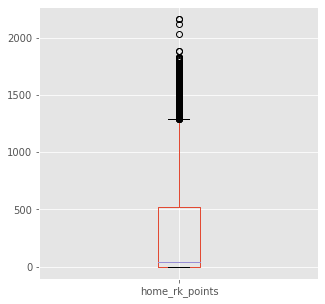

In [127]:
match_history.boxplot(column=['home_rk_points'],figsize=(5,5))

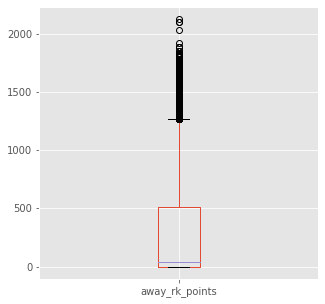

In [128]:
match_history.boxplot(column=['away_rk_points'],figsize=(5,5))

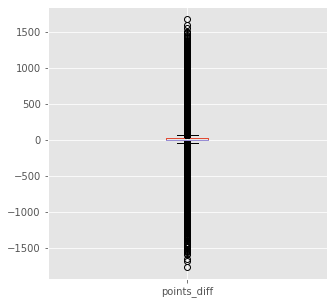

In [129]:
match_history.boxplot(column=['points_diff'],figsize=(5,5))

In [130]:
match_history.describe()

,neutral,home_rk_points,away_rk_points,winner,points_diff
count,43421.000000,43421.000000,43421.000000,43421.000000,43421.000000
mean,0.248083,297.841942,290.942029,0.204003,6.899913
std,0.431905,417.094465,410.478457,0.853218,213.275172
min,0.000000,0.000000,0.000000,-1.000000,-1757.000000
25%,0.000000,0.000000,0.000000,-1.000000,-7.000000
50%,0.000000,40.000000,38.000000,0.000000,0.000000
75%,0.000000,518.000000,508.000000,1.000000,21.000000
max,1.000000,2164.000000,2124.000000,1.000000,1669.000000


In [131]:
match_history.isnull().sum()

date              0
home_team         0
away_team         0
neutral           0
home_rk_points    0
away_rk_points    0
winner            0
points_diff       0
dtype: int64

In [132]:
match_history.isna().sum()

date              0
home_team         0
away_team         0
neutral           0
home_rk_points    0
away_rk_points    0
winner            0
points_diff       0
dtype: int64

In [133]:
match_history.corr()

,neutral,home_rk_points,away_rk_points,winner,points_diff
neutral,1.000000,0.010122,0.003208,-0.077467,0.013622
home_rk_points,0.010122,1.000000,0.867289,0.058704,0.286443
away_rk_points,0.003208,0.867289,1.000000,-0.083777,-0.228518
winner,-0.077467,0.058704,-0.083777,1.000000,0.276046
points_diff,0.013622,0.286443,-0.228518,0.276046,1.000000


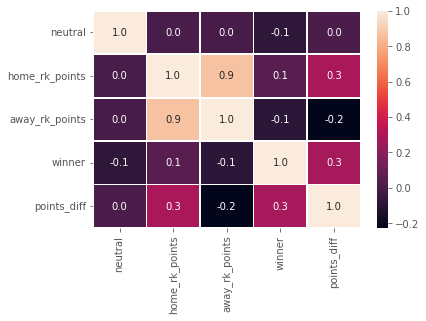

In [134]:
plot = sn.heatmap(match_history.corr(), annot = True, fmt=".1f", linewidths=.6)
plot

Home Wins: 21137
Away Wins: 12279
Draws: 10005


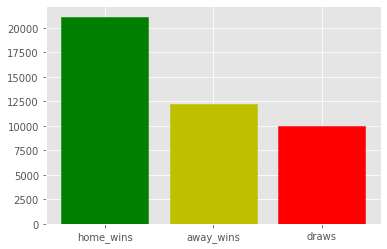

In [135]:
home_wins = match_history.loc[match_history['winner']==1].value_counts().count()
away_wins = match_history.loc[match_history['winner']==-1].value_counts().count()
draws = match_history.loc[match_history['winner']==0].value_counts().count()

print('Home Wins:', home_wins)
print('Away Wins:', away_wins)
print('Draws:', draws)

bar = plt.bar(x=['home_wins', 'away_wins', 'draws'],height=[home_wins, away_wins, draws])
bar[0].set_color('g')
bar[1].set_color('y')
bar[2].set_color('r')
plt.show()

Análise dos maiores vencedores em termos históricos

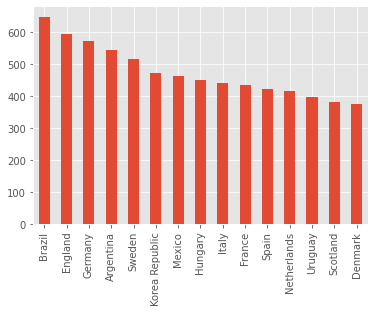

In [136]:
winner_as_home = match_history.loc[match_history['winner']==1].groupby('home_team')['home_team'].count().sort_values(ascending=False)
winner_as_away = match_history.loc[match_history['winner']==-1].groupby('away_team')['away_team'].count().sort_values(ascending=False)

winners = winner_as_home + winner_as_away
winners = winners.sort_values(ascending=False)
winners = winners.head(n=15)
winners.plot.bar(x=winners[0], y=winners[1])

Análise dos maiores perdedores em termos históricos

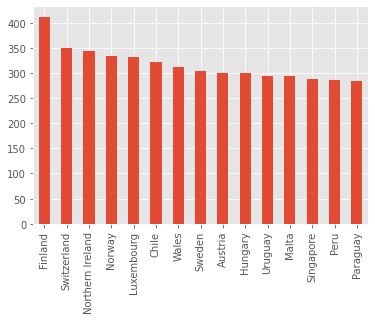

In [137]:
loser_as_home = match_history.loc[match_history['winner']==-1].groupby('home_team')['home_team'].count().sort_values(ascending=False)
loser_as_away = match_history.loc[match_history['winner']==1].groupby('away_team')['away_team'].count().sort_values(ascending=False)

losers = loser_as_home + loser_as_away
losers = losers.sort_values(ascending=False)
losers = losers.head(n=15)
losers.plot.bar(x=losers[0], y=losers[1])

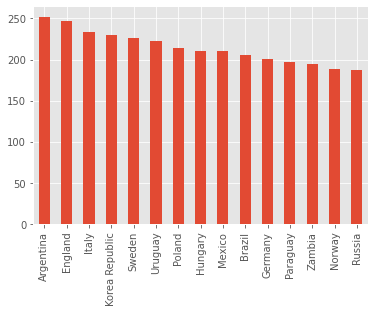

In [138]:
draw_as_home = match_history.loc[match_history['winner']==0].groupby('home_team')['home_team'].count().sort_values(ascending=False)
draw_as_away = match_history.loc[match_history['winner']==0].groupby('away_team')['away_team'].count().sort_values(ascending=False)

draws = draw_as_home + draw_as_away
draws = draws.sort_values(ascending=False)
draws = draws.head(n=15)
draws.plot.bar(x=losers[0], y=losers[1])

In [139]:
match_history.groupby('away_team')['home_team'].count().sort_values(ascending=False)

away_team
Uruguay          553
Sweden           543
England          520
Hungary          487
Paraguay         468
                ... 
Asturias           1
Barawa             1
Surrey             1
Central Spain      1
Manchukuo          1
Name: home_team, Length: 303, dtype: int64

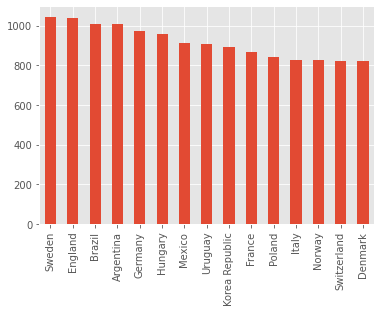

In [140]:
full_home = match_history.groupby('home_team')['home_team'].count().sort_values(ascending=False)
full_away = match_history.groupby('away_team')['away_team'].count().sort_values(ascending=False)

full_matches = full_home + full_away
full_matches = full_matches.sort_values(ascending=False)
full_matches = full_matches.head(n=15)
full_matches.plot.bar(x=losers[0], y=losers[1])

In [141]:
match_history['tournament'] = full_match_history['tournament']
match_history

,date,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,tournament
0,1872-11-30,Scotland,England,0,0.00,0.00,0,0.00,Friendly
1,1873-03-08,England,Scotland,0,0.00,0.00,1,0.00,Friendly
2,1874-03-07,Scotland,England,0,0.00,0.00,1,0.00,Friendly
3,1875-03-06,England,Scotland,0,0.00,0.00,0,0.00,Friendly
4,1876-03-04,Scotland,England,0,0.00,0.00,1,0.00,Friendly
...,...,...,...,...,...,...,...,...,...
43416,2022-03-30,Mexico,El Salvador,0,1647.90,1346.04,1,301.86,FIFA World Cup qualification
43417,2022-03-30,Costa Rica,USA,0,1464.06,1643.34,1,-179.28,FIFA World Cup qualification
43418,2022-03-30,Panama,Canada,0,1375.56,1497.82,1,-122.26,FIFA World Cup qualification
43419,2022-03-30,Jamaica,Honduras,0,1378.62,1303.96,1,74.66,FIFA World Cup qualification


# **Ultimos ajutes**

Para não confundir o algoritmo de Machine Learning iremos remover a coluna 'date', pois já a utilizamos para calcular a pontuação do ranking na epoca da partida e não é mais necessário

In [142]:
match_history.drop('date', axis = 1, inplace=True)

In [143]:
match_history.loc[match_history['winner']=='DRAW']

,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,tournament


In [144]:
# from sklearn.model_selection import train_test_split
# import random

# dummed = pd.get_dummies(match_history, prefix=['home_team', 'away_team','tournament'], columns=['home_team', 'away_team','tournament'])
# x = dummed.drop(['winner'], axis = 1)
# y = dummed['winner'].astype('int')

# max_size = 0
# random_value_final = 0

# for i in range(50):
#   X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i, shuffle=True)
#   if y_train.value_counts()[0] > max_size:
#     max_size = y_test.value_counts()[0]
#     random_value_final = i

# max_size, random_value_final

# **Separação das bases de teste**

Antes de separar a base em treino e testes, vamos criar variáveis dummies para para representar o nome das seleções e o torneio pelo qual a partida será realizada.

In [145]:
from sklearn.model_selection import train_test_split

dummed = pd.get_dummies(match_history, prefix=['home_team', 'away_team','tournament'], columns=['home_team', 'away_team','tournament'])
x = dummed.drop(['winner'], axis = 1)
y = dummed['winner'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=49, shuffle=True)

In [146]:
X_test

,neutral,home_rk_points,away_rk_points,points_diff,home_team_Abkhazia,home_team_Afghanistan,home_team_Albania,home_team_Alderney,home_team_Algeria,home_team_American Samoa,...,tournament_UNIFFAC Cup,tournament_USA Cup,tournament_United Arab Emirates Friendship Tournament,tournament_VFF Cup,tournament_Vietnam Independence Cup,tournament_Viva World Cup,tournament_WAFF Championship,tournament_West African Cup,tournament_Windward Islands Tournament,tournament_World Unity Cup
13850,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37976,0,290.0,416.0,-126.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12848,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15756,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11592,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33332,0,32.0,159.0,-127.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22724,1,597.0,604.0,-7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40131,1,2036.0,2099.0,-63.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5542,1,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Definição e treinamento do Modelo**
## Escolhendo o algoritmo a ser utilizado

In [147]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# algorithm = RidgeClassifier()
algorithm = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000,multi_class='multinomial')

# algorithm = XGBClassifier(max_depth=5, nthread=2, random_state=7)

# algorithm = KNeighborsClassifier()

# algorithm = GradientBoostingClassifier()
# algorithm = DecisionTreeClassifier(max_depth=50)


In [148]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

algorithm.fit(X_train, y_train)
print(algorithm.coef_)


kfold = StratifiedKFold(n_splits=5, random_state=49, shuffle=True)
results = cross_val_score(algorithm, X_test, y_test, cv=kfold, scoring='accuracy')


print('Algorithm ->', type(algorithm).__name__)
print(type(kfold).__name__,"Accuracy: %.2f%% (%.2f%%) std" % (results.mean()*100, results.std()*100))

[[ 3.86584310e-01 -3.48591172e-04  3.09799100e-04 ...  2.81348019e-01
  -1.91315497e-01  2.62423982e-01]
 [-2.97902390e-02  1.13855310e-04  4.03641566e-05 ...  1.84471511e-03
   3.69673772e-01 -7.33547621e-02]
 [-3.56794071e-01  2.34735861e-04 -3.50163258e-04 ... -2.83192734e-01
  -1.78358275e-01 -1.89069220e-01]]
Algorithm -> LogisticRegression
StratifiedKFold Accuracy: 55.61% (0.56%) std


              precision    recall  f1-score   support

          -1       0.54      0.50      0.52      3761
           0       0.30      0.08      0.13      2955
           1       0.60      0.84      0.70      6311

    accuracy                           0.57     13027
   macro avg       0.48      0.47      0.45     13027
weighted avg       0.52      0.57      0.52     13027



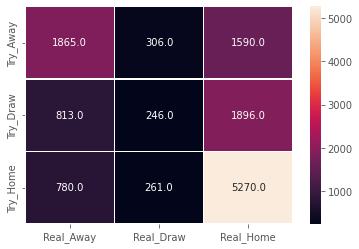

In [149]:
# Calculando e exibindo a Matriz de Confusão
predicted = algorithm.predict(X_test)
cm = confusion_matrix(y_test, predicted)
cr = classification_report(y_test, predicted)

print(cr)

plot = sn.heatmap(cm,xticklabels=['Real_Away','Real_Draw','Real_Home'], yticklabels=['Try_Away','Try_Draw','Try_Home'], annot = True, fmt=".1f", linewidths=.6)

plot

# Carregando os grupos da Copa



In [150]:
group_data = {"GROUP_A": [{"name": "Qatar", "wins": 0, "losses": 0, "draw": 0, "seed": "1","points": 0},{"name": "Ecuador", "wins": 0, "losses": 0, "draw": 0, "seed": "2","points": 0},{"name": "Senegal", "wins": 0, "losses": 0, "draw": 0, "seed": "3","points": 0},{"name": "Netherlands", "wins": 0, "losses": 0, "draw": 0, "seed": "4","points": 0}],"GROUP_B": [{"name": "England", "wins": 0, "losses": 0, "draw": 0, "seed": "1","points": 0},{"name": "IR Iran", "wins": 0, "losses": 0, "draw": 0, "seed": "2","points": 0},{"name": "USA", "wins": 0, "losses": 0, "draw": 0, "seed": "3","points": 0},{"name": "Europe", "wins": 0, "losses": 0, "draw": 0, "seed": "4","points": 0}],"GROUP_C": [{"name": "Argentina", "wins": 0, "losses": 0, "draw": 0, "seed": "1","points": 0},{"name": "Saudi Arabia", "wins": 0, "losses": 0, "draw": 0, "seed": "2","points": 0},{"name": "Mexico", "wins": 0, "losses": 0, "draw": 0, "seed": "3","points": 0},{"name": "Poland", "wins": 0, "losses": 0, "draw": 0, "seed": "4","points": 0}],"GROUP_D": [{"name": "France", "wins": 0, "losses": 0, "draw": 0, "seed": "1","points": 0},{"name": "IC1", "wins": 0, "losses": 0, "draw": 0, "seed": "2","points": 0},{"name": "Denmark", "wins": 0, "losses": 0, "draw": 0, "seed": "3","points": 0},{"name": "Tunisia", "wins": 0, "losses": 0, "draw": 0, "seed": "4","points": 0}],"GROUP_E": [{"name": "Spain", "wins": 0, "losses": 0, "draw": 0, "seed": "1","points": 0},{"name": "IC2", "wins": 0, "losses": 0, "draw": 0, "seed": "2","points": 0},{"name": "Germany", "wins": 0, "losses": 0, "draw": 0, "seed": "3","points": 0},{"name": "Japan", "wins": 0, "losses": 0, "draw": 0, "seed": "4","points": 0}],"GROUP_F": [{"name": "Belgium", "wins": 0, "losses": 0, "draw": 0, "seed": "1","points": 0},{"name": "Canada", "wins": 0, "losses": 0, "draw": 0, "seed": "2","points": 0},{"name": "Morocco", "wins": 0, "losses": 0, "draw": 0, "seed": "3","points": 0},{"name": "Croatia", "wins": 0, "losses": 0, "draw": 0, "seed": "4","points": 0}],"GROUP_G": [{"name": "Brazil", "wins": 0, "losses": 0, "draw": 0, "seed": "1","points": 0},{"name": "Serbia", "wins": 0, "losses": 0, "draw": 0, "seed": "2","points": 0},{"name": "Switzerland", "wins": 0, "losses": 0, "draw": 0, "seed": "3","points": 0},{"name": "Cameroon", "wins": 0, "losses": 0, "draw": 0, "seed": "4","points": 0}],"GROUP_H": [{"name": "Portugal", "wins": 0, "losses": 0, "draw": 0, "seed": "1","points": 0},{"name": "Ghana", "wins": 0, "losses": 0, "draw": 0, "seed": "2","points": 0},{"name": "Uruguay", "wins": 0, "losses": 0, "draw": 0, "seed": "3","points": 0},{"name": "Korea Republic", "wins": 0, "losses": 0, "draw": 0, "seed": "4","points": 0}],"points": 0}

In [151]:
def create_match_df(team_1, team_2, stage = None, group_name = None):

  return pd.DataFrame().append(create_match_serie(team_1, team_2, stage, group_name),ignore_index=True)

def create_match_serie(team_1, team_2, stage = None, group_name = None):
  rk_team_1, rk_team_2 = find_ranking_points_team_for_match(team_1,team_2)

  return pd.Series([team_1,team_2,1,rk_team_1,rk_team_2, None, rk_team_1 - rk_team_2, stage, group_name,'FIFA World Cup'],['home_team','away_team','neutral','home_rk_points','away_rk_points','winner','points_diff', 'stage', 'group_name','tournament'])

def predict_match(dataframe, algorithm):
  predict_df = pd.get_dummies(dataframe, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

  predict_df = predict_df.drop(['stage','group_name'], axis = 1)

  columns = set(dummed.columns) - set(predict_df.columns)

  for col in columns:
    predict_df[col] = 0

  predict_df = predict_df[dummed.columns]

  predict_df = predict_df.drop(['winner'], axis = 1)

  dataframe['winner'] = algorithm.predict(predict_df)
  
  for index, row in dataframe.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']

    if hasattr(algorithm,'predict_proba'):
      away_win, draw, home_win  = algorithm.predict_proba(predict_df)[index]
      print(f'Partida entre {home_team} x {away_team} -> Predictions ( Home: {"%.2f"%(home_win*100)} % | Draw: {"%.2f"%(draw*100)} % | Away: {"%.2f"%(away_win*100)} % )')
    elif type(algorithm).__name__ == 'RidgeClassifier':
      away_win, draw, home_win  = predict_proba(algorithm,predict_df)[index]
      print(f'Partida entre {home_team} x {away_team} -> Predictions ( Home: {"%.2f"%(home_win*100)} % | Draw: {"%.2f"%(draw*100)} % | Away: {"%.2f"%(away_win*100)} % )')

  return dataframe

def get_winner_from_match(serie, permit_draw = False, find_winner = True):
  # find_winner -> True ('Winner') False ('Looser')
  winner = serie['winner']

  if winner == 0:
    if permit_draw:
      return 'DRAW'
    elif find_winner:
      # Em caso de empate, o ranking vai decidir quem é o vencedor, o que seria uma disputa de penalty
      return serie['home_team'] if serie['home_rk_points'] > serie['away_rk_points'] else serie['away_team']
    else:
      return serie['home_team'] if serie['home_rk_points'] < serie['away_rk_points'] else serie['away_team']
  elif winner == 1:
    return serie['home_team'] if find_winner else serie['away_team']
  else:
    return serie['away_team'] if find_winner else serie['home_team']

from sklearn.utils.extmath import softmax

def predict_proba(ridgeClassifier: RidgeClassifier, x):
  d = ridgeClassifier.decision_function(x)
  probs = []
  for item in d:
    probs.append(np.exp(item) / np.sum(np.exp(item)))
  return probs
  

Testando o algoritmo em caso Hipotético

In [152]:
df = pd.DataFrame()
df = df.append(pd.Series({'winner': 0,'home_team':'Croatia','away_team':'France', 'home_rk_points': 1018, 'away_rk_points': 1198,'group_name':'Fifa World Cup', 'stage': 1}), ignore_index=True)
predict_match(df, algorithm)
get_winner_from_match(df.iloc[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Croatia x France -> Predictions ( Home: 38.99 % | Draw: 33.72 % | Away: 27.29 % )


'Croatia'

# **Eliminatórias e Repescagens**

## **Eliminatórias Européias**

In [153]:
## Fase Final da Eliminatória da Europa

euro_1 = predict_match(create_match_df('Scotland', 'Ukraine'), algorithm)

euro_2 = predict_match(create_match_df('Wales',get_winner_from_match(euro_1.iloc[0])), algorithm)

classified_from_europe = get_winner_from_match(euro_2.iloc[0])

group_data['GROUP_B'][3]['name'] = classified_from_europe

print(classified_from_europe, 'Classificada para o grupo B da Copa do Mundo 2022')

group_data['GROUP_B']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Scotland x Ukraine -> Predictions ( Home: 30.86 % | Draw: 33.69 % | Away: 35.45 % )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Wales x Ukraine -> Predictions ( Home: 20.46 % | Draw: 35.79 % | Away: 43.75 % )
Ukraine Classificada para o grupo B da Copa do Mundo 2022


[{'draw': 0,
  'losses': 0,
  'name': 'England',
  'points': 0,
  'seed': '1',
  'wins': 0},
 {'draw': 0,
  'losses': 0,
  'name': 'IR Iran',
  'points': 0,
  'seed': '2',
  'wins': 0},
 {'draw': 0, 'losses': 0, 'name': 'USA', 'points': 0, 'seed': '3', 'wins': 0},
 {'draw': 0,
  'losses': 0,
  'name': 'Ukraine',
  'points': 0,
  'seed': '4',
  'wins': 0}]

## **Repescagem 1**

In [154]:
## Respescagem 1

rep_1 = predict_match(create_match_df('United Arab Emirates', 'Australia'), algorithm)

rep_2 = predict_match(create_match_df(get_winner_from_match(rep_1.iloc[0]), 'Peru'), algorithm)

classified_from_ic1 = get_winner_from_match(rep_2.iloc[0])

group_data['GROUP_D'][1]['name'] = classified_from_ic1

print(classified_from_ic1, 'Classificada para o grupo D da Copa do Mundo 2022')

group_data['GROUP_D']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre United Arab Emirates x Australia -> Predictions ( Home: 15.35 % | Draw: 21.45 % | Away: 63.20 % )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Australia x Peru -> Predictions ( Home: 32.10 % | Draw: 36.77 % | Away: 31.12 % )
Peru Classificada para o grupo D da Copa do Mundo 2022


[{'draw': 0,
  'losses': 0,
  'name': 'France',
  'points': 0,
  'seed': '1',
  'wins': 0},
 {'draw': 0, 'losses': 0, 'name': 'Peru', 'points': 0, 'seed': '2', 'wins': 0},
 {'draw': 0,
  'losses': 0,
  'name': 'Denmark',
  'points': 0,
  'seed': '3',
  'wins': 0},
 {'draw': 0,
  'losses': 0,
  'name': 'Tunisia',
  'points': 0,
  'seed': '4',
  'wins': 0}]

## **Repescagem 2**

In [155]:
## Respescagem 2

rep_3 = predict_match(create_match_df('Costa Rica', 'New Zealand'), algorithm)

classified_from_ic2 = get_winner_from_match(rep_3.iloc[0])

group_data['GROUP_E'][1]['name'] = classified_from_ic2

print(classified_from_ic2, 'Classificada para o grupo E da Copa do Mundo 2022')

group_data['GROUP_E']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Costa Rica x New Zealand -> Predictions ( Home: 48.13 % | Draw: 23.42 % | Away: 28.45 % )
Costa Rica Classificada para o grupo E da Copa do Mundo 2022


[{'draw': 0,
  'losses': 0,
  'name': 'Spain',
  'points': 0,
  'seed': '1',
  'wins': 0},
 {'draw': 0,
  'losses': 0,
  'name': 'Costa Rica',
  'points': 0,
  'seed': '2',
  'wins': 0},
 {'draw': 0,
  'losses': 0,
  'name': 'Germany',
  'points': 0,
  'seed': '3',
  'wins': 0},
 {'draw': 0,
  'losses': 0,
  'name': 'Japan',
  'points': 0,
  'seed': '4',
  'wins': 0}]

Grupos Fechados com o resultado das repescagens

In [156]:
group_a_df = pd.DataFrame(group_data['GROUP_A'])
group_b_df = pd.DataFrame(group_data['GROUP_B'])
group_c_df = pd.DataFrame(group_data['GROUP_C'])
group_d_df = pd.DataFrame(group_data['GROUP_D'])
group_e_df = pd.DataFrame(group_data['GROUP_E'])
group_f_df = pd.DataFrame(group_data['GROUP_F'])
group_g_df = pd.DataFrame(group_data['GROUP_G'])
group_h_df = pd.DataFrame(group_data['GROUP_H'])

# **Bem Amigos, começa a Copa do Mundo Fifa 2022 - Catar**

## **Fase de Grupos Copa**

In [157]:
def create_matches_from_group_stage(group_df, stage: int, fase_grupos_df, group_name):

  seed_1 = group_df.loc[group_df['seed']=='1']['name'].reset_index(drop=True)[0]
  seed_2 = group_df.loc[group_df['seed']=='2']['name'].reset_index(drop=True)[0]
  seed_3 = group_df.loc[group_df['seed']=='3']['name'].reset_index(drop=True)[0]
  seed_4 = group_df.loc[group_df['seed']=='4']['name'].reset_index(drop=True)[0]

  if stage == 1:
    fase_grupos_df = fase_grupos_df.append(create_match_serie(seed_1,seed_2, stage, group_name), ignore_index=True)
    fase_grupos_df = fase_grupos_df.append(create_match_serie(seed_3,seed_4, stage, group_name), ignore_index=True)
  elif stage == 2:
    fase_grupos_df = fase_grupos_df.append(create_match_serie(seed_1,seed_3, stage, group_name), ignore_index=True)
    fase_grupos_df = fase_grupos_df.append(create_match_serie(seed_2,seed_4, stage, group_name), ignore_index=True)
  elif stage == 3:
    fase_grupos_df = fase_grupos_df.append(create_match_serie(seed_1,seed_4, stage, group_name), ignore_index=True)
    fase_grupos_df = fase_grupos_df.append(create_match_serie(seed_2,seed_3, stage, group_name), ignore_index=True)
  else:
    raise Exception('Stage not Valid')

  return fase_grupos_df


In [158]:
fase_grupos_df = pd.DataFrame()

fase_grupos_df = create_matches_from_group_stage(group_a_df, 1, fase_grupos_df, 'GROUP_A')
fase_grupos_df = create_matches_from_group_stage(group_b_df, 1, fase_grupos_df, 'GROUP_B')
fase_grupos_df = create_matches_from_group_stage(group_c_df, 1, fase_grupos_df, 'GROUP_C')
fase_grupos_df = create_matches_from_group_stage(group_d_df, 1, fase_grupos_df, 'GROUP_D')
fase_grupos_df = create_matches_from_group_stage(group_e_df, 1, fase_grupos_df, 'GROUP_E')
fase_grupos_df = create_matches_from_group_stage(group_f_df, 1, fase_grupos_df, 'GROUP_F')
fase_grupos_df = create_matches_from_group_stage(group_g_df, 1, fase_grupos_df, 'GROUP_G')
fase_grupos_df = create_matches_from_group_stage(group_h_df, 1, fase_grupos_df, 'GROUP_H')
fase_grupos_df = create_matches_from_group_stage(group_a_df, 2, fase_grupos_df, 'GROUP_A')
fase_grupos_df = create_matches_from_group_stage(group_b_df, 2, fase_grupos_df, 'GROUP_B')
fase_grupos_df = create_matches_from_group_stage(group_c_df, 2, fase_grupos_df, 'GROUP_C')
fase_grupos_df = create_matches_from_group_stage(group_d_df, 2, fase_grupos_df, 'GROUP_D')
fase_grupos_df = create_matches_from_group_stage(group_e_df, 2, fase_grupos_df, 'GROUP_E')
fase_grupos_df = create_matches_from_group_stage(group_f_df, 2, fase_grupos_df, 'GROUP_F')
fase_grupos_df = create_matches_from_group_stage(group_g_df, 2, fase_grupos_df, 'GROUP_G')
fase_grupos_df = create_matches_from_group_stage(group_h_df, 2, fase_grupos_df, 'GROUP_H')
fase_grupos_df = create_matches_from_group_stage(group_a_df, 3, fase_grupos_df, 'GROUP_A')
fase_grupos_df = create_matches_from_group_stage(group_b_df, 3, fase_grupos_df, 'GROUP_B')
fase_grupos_df = create_matches_from_group_stage(group_c_df, 3, fase_grupos_df, 'GROUP_C')
fase_grupos_df = create_matches_from_group_stage(group_d_df, 3, fase_grupos_df, 'GROUP_D')
fase_grupos_df = create_matches_from_group_stage(group_e_df, 3, fase_grupos_df, 'GROUP_E')
fase_grupos_df = create_matches_from_group_stage(group_f_df, 3, fase_grupos_df, 'GROUP_F')
fase_grupos_df = create_matches_from_group_stage(group_g_df, 3, fase_grupos_df, 'GROUP_G')
fase_grupos_df = create_matches_from_group_stage(group_h_df, 3, fase_grupos_df, 'GROUP_H')

fase_grupos_df



,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Qatar,Ecuador,1.0,1441.41,1452.63,None,-11.22,1.0,GROUP_A,FIFA World Cup
1,Senegal,Netherlands,1.0,1584.16,1658.66,None,-74.50,1.0,GROUP_A,FIFA World Cup
2,England,IR Iran,1.0,1761.71,1564.49,None,197.22,1.0,GROUP_B,FIFA World Cup
3,USA,Ukraine,1.0,1633.72,1535.08,None,98.64,1.0,GROUP_B,FIFA World Cup
4,Argentina,Saudi Arabia,1.0,1765.13,1444.69,None,320.44,1.0,GROUP_C,FIFA World Cup
5,Mexico,Poland,1.0,1658.82,1544.20,None,114.62,1.0,GROUP_C,FIFA World Cup
6,France,Peru,1.0,1789.85,1562.32,None,227.53,1.0,GROUP_D,FIFA World Cup
7,Denmark,Tunisia,1.0,1653.60,1499.80,None,153.80,1.0,GROUP_D,FIFA World Cup
8,Spain,Costa Rica,1.0,1709.19,1503.09,None,206.10,1.0,GROUP_E,FIFA World Cup
9,Germany,Japan,1.0,1650.53,1553.44,None,97.09,1.0,GROUP_E,FIFA World Cup


In [159]:
fase_grupos_df = predict_match(fase_grupos_df, algorithm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Qatar x Ecuador -> Predictions ( Home: 26.77 % | Draw: 37.73 % | Away: 35.50 % )
Partida entre Senegal x Netherlands -> Predictions ( Home: 16.27 % | Draw: 24.17 % | Away: 59.56 % )
Partida entre England x IR Iran -> Predictions ( Home: 37.82 % | Draw: 36.86 % | Away: 25.32 % )
Partida entre USA x Ukraine -> Predictions ( Home: 28.83 % | Draw: 35.54 % | Away: 35.63 % )
Partida entre Argentina x Saudi Arabia -> Predictions ( Home: 71.07 % | Draw: 22.06 % | Away: 6.88 % )
Partida entre Mexico x Poland -> Predictions ( Home: 38.15 % | Draw: 30.86 % | Away: 30.99 % )
Partida entre France x Peru -> Predictions ( Home: 50.80 % | Draw: 33.34 % | Away: 15.85 % )
Partida entre Denmark x Tunisia -> Predictions ( Home: 42.66 % | Draw: 37.29 % | Away: 20.05 % )
Partida entre Spain x Costa Rica -> Predictions ( Home: 66.98 % | Draw: 23.57 % | Away: 9.45 % )
Partida entre Germany x Japan -> Predictions ( Home: 61.17 % | Draw: 20.26 % | Away: 18.57 % )
Partida entre Belgium x Canada -> 

In [160]:
fase_grupos_df.head()

,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Qatar,Ecuador,1.0,1441.41,1452.63,0,-11.22,1.0,GROUP_A,FIFA World Cup
1,Senegal,Netherlands,1.0,1584.16,1658.66,-1,-74.50,1.0,GROUP_A,FIFA World Cup
2,England,IR Iran,1.0,1761.71,1564.49,1,197.22,1.0,GROUP_B,FIFA World Cup
3,USA,Ukraine,1.0,1633.72,1535.08,-1,98.64,1.0,GROUP_B,FIFA World Cup
4,Argentina,Saudi Arabia,1.0,1765.13,1444.69,1,320.44,1.0,GROUP_C,FIFA World Cup


Preenchendo os Grupos com os pontos dos times

In [161]:
def fill_group_points(matches_stage_df, group_df):

  group_a_modified = pd.DataFrame()
  
  for team_idx, team_row in group_df.iterrows():
    team_name = team_row['name']

    wins = matches_stage_df.loc[((matches_stage_df['home_team']==team_name) & (matches_stage_df['winner']==1)) | ((matches_stage_df['away_team']==team_name) & (matches_stage_df['winner']==-1))]
    draws = matches_stage_df.loc[((matches_stage_df['home_team']==team_name) | (matches_stage_df['away_team']==team_name)) & (matches_stage_df['winner']==0)]
    loss = matches_stage_df.loc[((matches_stage_df['home_team']==team_name) & (matches_stage_df['winner']==-1)) | ((matches_stage_df['away_team']==team_name) & (matches_stage_df['winner']==1))]
    
    team_row['wins'] = len(wins)
    team_row['draw'] = len(draws)
    team_row['losses'] = len(loss)

    team_row['points'] = len(wins)*3 + len(draws)
 
    group_a_modified = group_a_modified.append(team_row,ignore_index=True)
  
  return group_a_modified.sort_values(['seed']).sort_values(['points'], ascending=False).reset_index(drop=True)


group_a_df = fill_group_points(fase_grupos_df, group_a_df)
group_b_df = fill_group_points(fase_grupos_df, group_b_df)
group_c_df = fill_group_points(fase_grupos_df, group_c_df)
group_d_df = fill_group_points(fase_grupos_df, group_d_df)
group_e_df = fill_group_points(fase_grupos_df, group_e_df)
group_f_df = fill_group_points(fase_grupos_df, group_f_df)
group_g_df = fill_group_points(fase_grupos_df, group_g_df)
group_h_df = fill_group_points(fase_grupos_df, group_h_df)


In [162]:
group_h_df

,name,wins,losses,draw,seed,points
0,Portugal,2.0,0.0,1.0,1,7.0
1,Uruguay,2.0,0.0,1.0,3,7.0
2,Ghana,0.0,2.0,1.0,2,1.0
3,Korea Republic,0.0,2.0,1.0,4,1.0


In [163]:
playoffs_winners = []

## **Oitavas de Final**

In [164]:
def define_round_16(group_a, group_b, group_c, group_d, group_e, group_f, group_g, group_h):
  df_round_16 = pd.DataFrame()

  df_round_16 = df_round_16.append(create_match_serie(group_a['name'][0], group_b['name'][1], stage=4, group_name='ROUND16'), ignore_index=True)
  df_round_16 = df_round_16.append(create_match_serie(group_c['name'][0], group_d['name'][1], stage=4, group_name='ROUND16'), ignore_index=True)
  df_round_16 = df_round_16.append(create_match_serie(group_e['name'][0], group_f['name'][1], stage=4, group_name='ROUND16'), ignore_index=True)
  df_round_16 = df_round_16.append(create_match_serie(group_g['name'][0], group_h['name'][1], stage=4, group_name='ROUND16'), ignore_index=True)
  df_round_16 = df_round_16.append(create_match_serie(group_b['name'][0], group_a['name'][1], stage=4, group_name='ROUND16'), ignore_index=True)
  df_round_16 = df_round_16.append(create_match_serie(group_d['name'][0], group_c['name'][1], stage=4, group_name='ROUND16'), ignore_index=True)
  df_round_16 = df_round_16.append(create_match_serie(group_f['name'][0], group_e['name'][1], stage=4, group_name='ROUND16'), ignore_index=True)
  df_round_16 = df_round_16.append(create_match_serie(group_h['name'][0], group_g['name'][1], stage=4, group_name='ROUND16'), ignore_index=True)

  playoffs_winners.extend([group_g['name'][1], group_h['name'][0]])
  playoffs_winners.extend([group_e['name'][1], group_f['name'][0]])
  playoffs_winners.extend([group_c['name'][1], group_d['name'][0]])
  playoffs_winners.extend([group_a['name'][1], group_b['name'][0]])
  
  playoffs_winners.extend([group_h['name'][1], group_g['name'][0]])
  playoffs_winners.extend([group_f['name'][1], group_e['name'][0]])
  playoffs_winners.extend([group_d['name'][1], group_c['name'][0]])
  playoffs_winners.extend([group_b['name'][1], group_a['name'][0]])

  return df_round_16

round_16 = define_round_16(group_a_df,group_b_df,group_c_df,group_d_df,group_e_df,group_f_df,group_g_df,group_h_df)

In [165]:
round_16

,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Netherlands,IR Iran,1.0,1658.66,1564.49,None,94.17,4.0,ROUND16,FIFA World Cup
1,Argentina,Denmark,1.0,1765.13,1653.60,None,111.53,4.0,ROUND16,FIFA World Cup
2,Germany,Morocco,1.0,1650.53,1551.88,None,98.65,4.0,ROUND16,FIFA World Cup
3,Brazil,Uruguay,1.0,1832.69,1635.73,None,196.96,4.0,ROUND16,FIFA World Cup
4,England,Senegal,1.0,1761.71,1584.16,None,177.55,4.0,ROUND16,FIFA World Cup
5,France,Mexico,1.0,1789.85,1658.82,None,131.03,4.0,ROUND16,FIFA World Cup
6,Belgium,Spain,1.0,1827.00,1709.19,None,117.81,4.0,ROUND16,FIFA World Cup
7,Portugal,Serbia,1.0,1674.78,1547.53,None,127.25,4.0,ROUND16,FIFA World Cup


In [166]:
round_16 = predict_match(round_16, algorithm)
round_16

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Netherlands x IR Iran -> Predictions ( Home: 31.26 % | Draw: 37.66 % | Away: 31.08 % )
Partida entre Argentina x Denmark -> Predictions ( Home: 54.53 % | Draw: 30.22 % | Away: 15.25 % )
Partida entre Germany x Morocco -> Predictions ( Home: 41.07 % | Draw: 41.31 % | Away: 17.62 % )
Partida entre Brazil x Uruguay -> Predictions ( Home: 60.88 % | Draw: 27.36 % | Away: 11.77 % )
Partida entre England x Senegal -> Predictions ( Home: 53.62 % | Draw: 28.95 % | Away: 17.44 % )
Partida entre France x Mexico -> Predictions ( Home: 41.65 % | Draw: 27.51 % | Away: 30.84 % )
Partida entre Belgium x Spain -> Predictions ( Home: 20.92 % | Draw: 34.62 % | Away: 44.46 % )
Partida entre Portugal x Serbia -> Predictions ( Home: 32.17 % | Draw: 40.58 % | Away: 27.25 % )


,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Netherlands,IR Iran,1.0,1658.66,1564.49,0,94.17,4.0,ROUND16,FIFA World Cup
1,Argentina,Denmark,1.0,1765.13,1653.60,1,111.53,4.0,ROUND16,FIFA World Cup
2,Germany,Morocco,1.0,1650.53,1551.88,0,98.65,4.0,ROUND16,FIFA World Cup
3,Brazil,Uruguay,1.0,1832.69,1635.73,1,196.96,4.0,ROUND16,FIFA World Cup
4,England,Senegal,1.0,1761.71,1584.16,1,177.55,4.0,ROUND16,FIFA World Cup
5,France,Mexico,1.0,1789.85,1658.82,1,131.03,4.0,ROUND16,FIFA World Cup
6,Belgium,Spain,1.0,1827.00,1709.19,-1,117.81,4.0,ROUND16,FIFA World Cup
7,Portugal,Serbia,1.0,1674.78,1547.53,0,127.25,4.0,ROUND16,FIFA World Cup


## **Quartas de Final**


In [167]:
def define_quarter_finals(round_16_finished):
  df_quarter_finals = pd.DataFrame()
 
  round_16_winners = []

  for idx, row in round_16_finished.iterrows():
    round_16_winners.append(get_winner_from_match(row))

  playoffs_winners.extend(reversed(round_16_winners))

  df_quarter_finals = df_quarter_finals.append(create_match_serie(round_16_winners[0], round_16_winners[1], stage=5, group_name='QuarterFinals'), ignore_index=True)
  df_quarter_finals = df_quarter_finals.append(create_match_serie(round_16_winners[2], round_16_winners[3], stage=5, group_name='QuarterFinals'), ignore_index=True)
  df_quarter_finals = df_quarter_finals.append(create_match_serie(round_16_winners[4], round_16_winners[5], stage=5, group_name='QuarterFinals'), ignore_index=True)
  df_quarter_finals = df_quarter_finals.append(create_match_serie(round_16_winners[6], round_16_winners[7], stage=5, group_name='QuarterFinals'), ignore_index=True)
 
  return df_quarter_finals

df_quarter_finals = define_quarter_finals(round_16)

In [168]:
df_quarter_finals = predict_match(df_quarter_finals, algorithm)
df_quarter_finals

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Netherlands x Argentina -> Predictions ( Home: 20.23 % | Draw: 35.44 % | Away: 44.33 % )
Partida entre Germany x Brazil -> Predictions ( Home: 19.49 % | Draw: 27.85 % | Away: 52.66 % )
Partida entre England x France -> Predictions ( Home: 32.80 % | Draw: 29.32 % | Away: 37.88 % )
Partida entre Spain x Portugal -> Predictions ( Home: 45.69 % | Draw: 28.02 % | Away: 26.29 % )


,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Netherlands,Argentina,1.0,1658.66,1765.13,-1,-106.47,5.0,QuarterFinals,FIFA World Cup
1,Germany,Brazil,1.0,1650.53,1832.69,-1,-182.16,5.0,QuarterFinals,FIFA World Cup
2,England,France,1.0,1761.71,1789.85,-1,-28.14,5.0,QuarterFinals,FIFA World Cup
3,Spain,Portugal,1.0,1709.19,1674.78,1,34.41,5.0,QuarterFinals,FIFA World Cup


## **Semi Finais**

In [169]:
# Semifinals

def define_semi(df_quarter_finals):
  semi_final = pd.DataFrame()

  quarter_finals_winners = []

  for idx, row in df_quarter_finals.iterrows():
    quarter_finals_winners.append(get_winner_from_match(row))

  semi_final = semi_final.append(create_match_serie(quarter_finals_winners[0], quarter_finals_winners[1], stage=5, group_name='SemiFinals'), ignore_index=True)
  semi_final = semi_final.append(create_match_serie(quarter_finals_winners[2], quarter_finals_winners[3], stage=5, group_name='SemiFinals'), ignore_index=True)

  playoffs_winners.extend(reversed(quarter_finals_winners))

  return semi_final

semi_final = define_semi(df_quarter_finals)

In [170]:
semi_final

,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Argentina,Brazil,1.0,1765.13,1832.69,None,-67.56,5.0,SemiFinals,FIFA World Cup
1,France,Spain,1.0,1789.85,1709.19,None,80.66,5.0,SemiFinals,FIFA World Cup


In [171]:
semi_final = predict_match(semi_final, algorithm)
semi_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Argentina x Brazil -> Predictions ( Home: 30.01 % | Draw: 35.82 % | Away: 34.17 % )
Partida entre France x Spain -> Predictions ( Home: 21.32 % | Draw: 35.51 % | Away: 43.16 % )


,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Argentina,Brazil,1.0,1765.13,1832.69,0,-67.56,5.0,SemiFinals,FIFA World Cup
1,France,Spain,1.0,1789.85,1709.19,-1,80.66,5.0,SemiFinals,FIFA World Cup


## **Terceiro Lugar**

In [172]:
t_place = []

for idx, row in semi_final.iterrows():
  t_place.append(get_winner_from_match(row,find_winner=False))
  
t_place = create_match_df(t_place[0],t_place[1], stage=6, group_name='Third Place')
t_place

,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Argentina,France,1.0,1765.13,1789.85,None,-24.72,6.0,Third Place,FIFA World Cup


In [173]:
t_place = predict_match(t_place, algorithm)
t_place

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Argentina x France -> Predictions ( Home: 44.67 % | Draw: 32.64 % | Away: 22.69 % )


,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Argentina,France,1.0,1765.13,1789.85,1,-24.72,6.0,Third Place,FIFA World Cup


## **Grand Final**

In [174]:
#Final

semi_final_winners = []

for idx, row in semi_final.iterrows():
  semi_final_winners.append(get_winner_from_match(row))

playoffs_winners.extend(reversed(semi_final_winners))

grand_final = create_match_df(semi_final_winners[0],semi_final_winners[1], stage=6, group_name='Final')
grand_final

,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Brazil,Spain,1.0,1832.69,1709.19,None,123.5,6.0,Final,FIFA World Cup


In [175]:
grand_final = predict_match(grand_final, algorithm)
playoffs_winners.append(get_winner_from_match(grand_final.iloc[0]))
grand_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Partida entre Brazil x Spain -> Predictions ( Home: 41.08 % | Draw: 39.51 % | Away: 19.41 % )


,home_team,away_team,neutral,home_rk_points,away_rk_points,winner,points_diff,stage,group_name,tournament
0,Brazil,Spain,1.0,1832.69,1709.19,1,123.5,6.0,Final,FIFA World Cup


In [176]:
print('The Fifa World Cup 2022 - Qatar winner is', get_winner_from_match(grand_final.iloc[0]),'!!!')

The Fifa World Cup 2022 - Qatar winner is Brazil !!!
